__Use PYTHON’s Multinomial Naïve Bayes__ algorithm to build models to classify the customer reviews by   
(1) sentiment (positive or negative)   
(2) authenticity (true or fake, lie detection)  

For each of the two classification tasks, use MNB to build the models, and evaluate them using 10-fold cross validation methods. (5-fold is fine too) 

__Use CountVectorizer and Python. Create labeled data. Train the NB model and test it.__ 

__As part of your Results section__: For each model (lie detection and sentiment classification), report the 20 most indicative words that the models have learned. 

__As part of your Results (the techy part) and Conclusions (the non-techy part) include discussion of__: Based on these words, do you think the models have learned the concepts (lie or sentiment) that they are expected to learn?

__As Part of Results__: Also, compare the difficulty level of sentiment classification vs. lie detection. Discuss whether you believe computers can detect fake reviews by the words.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 1000)

In [3]:
reviews = pd.read_csv('deception_data_converted_final.tsv', sep='\t')

In [4]:
reviews.shape

(92, 3)

In [5]:
reviews.sample(5, random_state=6)

,lie,sentiment,review
55,f,p,"'Two days ago, I went to the rooftop restaurant in NYC that served brunch. it was one of the best brunch that I have ever had. The view from the table was serene and I could see both the the Hudson River and the East River with outstanding views of Empire State Building, the Chryslers tower, Freedom tower and the Central park. A great place with great food and a perplexing view'"
20,f,n,"'Usually, I use Yelp to find restaurant. The Yelp would give restaurant \'stars\' to divide them into different level. And it has own map to direct you to the right place. This summer, I use it to search a subway shop in New York city, and then it give me a best choice. I followed the map to that store, and then I was surprised. It is a butcher\'s which sell ham gammon. I can not find any subway in this store. When I asked the shop assistant, he said that you can bought ham to do subway by yourself.'"
23,t,n,"'Pizza Hut Syracuse, NY The only thing worth going here for is the lunch salad bar. The decor is very dated and the pizza is GREESY. Tables and bathroom are dirty. Waitstaff seem to have low expectations of service.'"
30,t,n,"'I went to Applebees (regrettably) once and it was a train-wreck. The server was in a terrible mood, the beers arrived after the dinner was delivered, the appetizer was wrong, food was bad, the check was wrong, and there were barely any other people inside! I was pretty baffled at how so many things just went wrong in the whole process, the restaurant wasn\'t even busy. '"
0,f,n,"'Mike\'s Pizza High Point, NY Service was very slow and the quality was low. You would think they would know at least how to make good pizza, not. Stick to pre-made dishes like stuffed pasta or a salad. You should consider dining else where.'"


Summary:
   * 92 instances
   * labels are located at fisrt two columns, one is for `lie`; the other is for `sentiment`
   * back slash and apostrophe have to be removed

In [6]:
def clean_str(string):
    """
    expect: a string with leading and trailing apostrophe and a back slash within the string
    ex:"'I found worm \in one of the dishes.'"
    modify: Remove the trailing and leading apostrophe and back slash
    return: return a string
    """
    temp = re.sub(r'\\', '', string)
    result = temp.strip("'")
    return result

In [7]:
sentiment_mapper = {'n':0,'p':1}
lie_mapper = {'f': 1, 't': 0} # true = 0 ; fake = 1
reviews['review'] = reviews.review.map(clean_str)
reviews['lie_num'] = reviews.lie.map(lie_mapper)
reviews['sentiment_num'] = reviews.sentiment.map(sentiment_mapper)
reviews['review_length'] = reviews.review.apply(lambda string: len(string))
reviews['review_tokens'] = reviews.review.apply(lambda string: len(string.split()))

In [8]:
reviews.sample(5, random_state=6)

,lie,sentiment,review,lie_num,sentiment_num,review_length,review_tokens
55,f,p,"Two days ago, I went to the rooftop restaurant in NYC that served brunch. it was one of the best brunch that I have ever had. The view from the table was serene and I could see both the the Hudson River and the East River with outstanding views of Empire State Building, the Chryslers tower, Freedom tower and the Central park. A great place with great food and a perplexing view",1,1,379,72
20,f,n,"Usually, I use Yelp to find restaurant. The Yelp would give restaurant 'stars' to divide them into different level. And it has own map to direct you to the right place. This summer, I use it to search a subway shop in New York city, and then it give me a best choice. I followed the map to that store, and then I was surprised. It is a butcher's which sell ham gammon. I can not find any subway in this store. When I asked the shop assistant, he said that you can bought ham to do subway by yourself.",1,0,500,100
23,t,n,"Pizza Hut Syracuse, NY The only thing worth going here for is the lunch salad bar. The decor is very dated and the pizza is GREESY. Tables and bathroom are dirty. Waitstaff seem to have low expectations of service.",0,0,214,39
30,t,n,"I went to Applebees (regrettably) once and it was a train-wreck. The server was in a terrible mood, the beers arrived after the dinner was delivered, the appetizer was wrong, food was bad, the check was wrong, and there were barely any other people inside! I was pretty baffled at how so many things just went wrong in the whole process, the restaurant wasn't even busy.",0,0,371,66
0,f,n,"Mike's Pizza High Point, NY Service was very slow and the quality was low. You would think they would know at least how to make good pizza, not. Stick to pre-made dishes like stuffed pasta or a salad. You should consider dining else where.",1,0,239,44


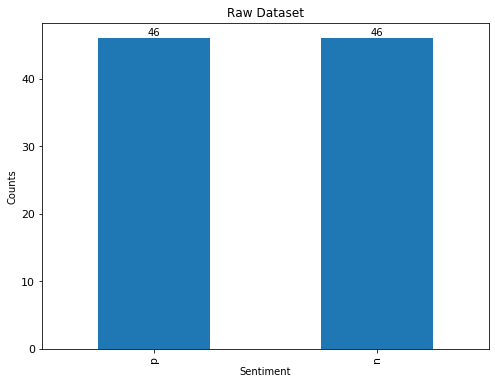

In [9]:
reviews.sentiment.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11)
plt.title('Raw Dataset', size=12)
plt.xlabel('Sentiment')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(2):
    plt.text(x = i - 0.03 , y = reviews.sentiment.value_counts().values[i] + 0.4, 
             s = reviews.sentiment.value_counts().values[i])
plt.show()

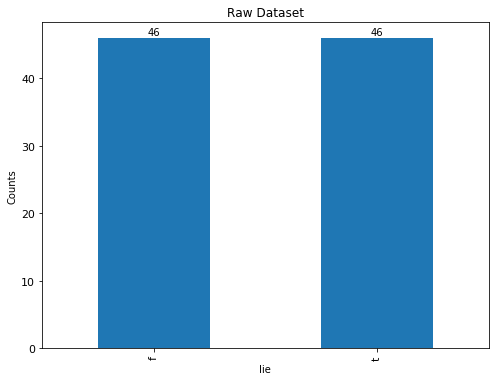

In [10]:
reviews.lie.value_counts().plot(kind='bar', figsize=(8,6), fontsize=11)
plt.title('Raw Dataset', size=12)
plt.xlabel('lie')
plt.ylabel('Counts')
# add annotation on each bar
for i in range(2):
    plt.text(x = i - 0.03 , y = reviews.lie.value_counts().values[i] + 0.4, 
             s = reviews.lie.value_counts().values[i])
plt.show()

## Sentiment

In [11]:
# define X and y
X = reviews.review
y = reviews.sentiment_num

In [12]:
# check the 
print(X.shape)
print(y.shape)

(92,)
(92,)


### Holdout set technique: Train/test split

In [13]:
from sklearn.model_selection import train_test_split # test_size=0.25 in default
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,)

In [14]:
# import and instantiate CountVectorizer (with default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
%%time
# create a document-term matrix from all of the training data
X_train_dtm = vect.fit_transform(X_train)
print('X_train_dtm shape: {}'.format(X_train_dtm.shape))
X_test_dtm = vect.transform(X_test)
print('X_test_dtm shape: {}'.format(X_test_dtm.shape))

X_train_dtm shape: (69, 1159)
X_test_dtm shape: (23, 1159)
Wall time: 9.97 ms


In [16]:
print('There are {} tokens'.format(len(vect.get_feature_names())))
print(vect.get_feature_names()[:50])

There are 1159 tokens
['10', '100', '15', '16', '20', '25', '2nd', '30', '50', '5pm', '6pm', 'abc', 'about', 'abruptly', 'acceptable', 'accord', 'acknowledge', 'actually', 'ad', 'add', 'additional', 'affordable', 'aforementioned', 'after', 'afternoon', 'again', 'aghast', 'ago', 'air', 'albert', 'all', 'almost', 'along', 'already', 'also', 'although', 'always', 'am', 'amazing', 'ambiance', 'ambient', 'america', 'american', 'amount', 'an', 'and', 'angry', 'another', 'any', 'anybody']


In [17]:
# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [18]:
%%time
# Train the model and make a prediction
nb.fit(X_train_dtm.toarray(), y_train)
y_pred_class = nb.predict(X_test_dtm.toarray())

Wall time: 29.9 ms


In [19]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred_class)*100, 2)))

Accuracy: 86.96%


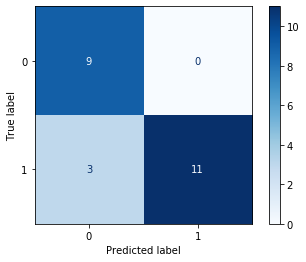

In [20]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
maxtix = plot_confusion_matrix(nb, X_test_dtm.toarray(), y_test, cmap='Blues', values_format='.3g')

In [21]:
reviews.loc[y_test.index, 'sentiment']

59    p
73    p
44    n
56    p
74    p
81    p
84    p
53    p
54    p
39    n
40    n
31    n
80    p
27    n
38    n
55    p
10    n
2     n
91    p
89    p
48    p
19    n
86    p
Name: sentiment, dtype: object

In [22]:
y_test

59    1
73    1
44    0
56    1
74    1
81    1
84    1
53    1
54    1
39    0
40    0
31    0
80    1
27    0
38    0
55    1
10    0
2     0
91    1
89    1
48    1
19    0
86    1
Name: sentiment_num, dtype: int64

In [23]:
y_test.value_counts()

1    14
0     9
Name: sentiment_num, dtype: int64

In [24]:
result = (y_test.value_counts()[1]/y_test.shape[0])
print('Base model(null model) for sentiment prediction in testing set: {}%'.format(round(result, 2)))

Base model(null model) for sentiment prediction in testing set: 0.61%


In [25]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class, digits=4))

              precision    recall  f1-score   support

           0     0.7500    1.0000    0.8571         9
           1     1.0000    0.7857    0.8800        14

    accuracy                         0.8696        23
   macro avg     0.8750    0.8929    0.8686        23
weighted avg     0.9022    0.8696    0.8711        23



#### K-fold Cross-validation

In [26]:
%%time
nb = MultinomialNB()

vect_cv= CountVectorizer()
X_dtm = vect_cv.fit_transform(X)

# evaluate with 5-fold cross-validation (using X instead of X_train)
from sklearn.model_selection import cross_val_score
result = cross_val_score(nb, X_dtm.toarray(), y, cv=5, scoring='accuracy').mean()
print('Accuracy: {}%'.format(round(result*100, 2)))

Accuracy: 88.01%
Wall time: 62.8 ms


In [27]:
print('Base model(null model) for sentiment prediction: {}%'.format((y.value_counts()/y.shape[0])[0]))

Base model(null model) for sentiment prediction: 0.5%


#### Feature Ranking in MultinomialNB

In [28]:
X_tokens = vect_cv.get_feature_names()

In [29]:
# examine the first 50 tokens
print(X_tokens[0:50])

['10', '100', '15', '16', '20', '25', '2nd', '30', '50', '5pm', '6pm', '90', 'abc', 'about', 'abruptly', 'absolutely', 'acceptable', 'accord', 'acknowledge', 'across', 'actual', 'actually', 'ad', 'add', 'additional', 'adorable', 'affordable', 'aforementioned', 'after', 'afternoon', 'again', 'aghast', 'ago', 'agreed', 'air', 'albert', 'alfredo', 'all', 'almost', 'along', 'already', 'also', 'although', 'always', 'am', 'amazing', 'ambiance', 'ambient', 'amer', 'america']


In [30]:
# examine the last 50 tokens
print(X_tokens[-50:])

['when', 'whenever', 'where', 'whether', 'which', 'while', 'white', 'who', 'whole', 'whom', 'why', 'wifi', 'will', 'wine', 'wings', 'winning', 'winter', 'wish', 'with', 'within', 'without', 'woman', 'won', 'wonderful', 'wondering', 'words', 'worked', 'world', 'worm', 'worrying', 'worse', 'worst', 'worth', 'would', 'wouldn', 'wqr', 'wreck', 'write', 'written', 'wrong', 'wrote', 'xyz', 'yeah', 'yelp', 'yesterday', 'york', 'you', 'your', 'yourself', 'yuenan']


In [31]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [32]:
%%time 
# train the model using X_dtm
nb.fit(X_dtm, y)

Wall time: 998 µs


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
nb.feature_count_
# rows represent classes, columns represent tokens
print("Shape: {}".format(nb.feature_count_.shape))

Shape: (2, 1445)


In [34]:
# number of times each token appears across all 'neg' class
neg_token_count = nb.feature_count_[0, :]
neg_token_count

array([3., 1., 5., ..., 1., 2., 0.])

In [35]:
# number of times each token appears across all 'pos' class
pos_token_count = nb.feature_count_[1, :]
pos_token_count

array([1., 1., 1., ..., 7., 3., 1.])

In [36]:
# create a DataFrame of tokens with their separate atheism, forsale and med counts
tokens = pd.DataFrame({'token':X_tokens, 'neg':neg_token_count, 
                       'pos':pos_token_count}).set_index('token')

In [37]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

,neg,pos
token,,
walk,1.0,1.0
chef,0.0,1.0
raw,1.0,0.0
bento,0.0,1.0
least,3.0,0.0


In [38]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([46., 46.])

In [39]:
# Naive Bayes counts the number of observations for all classes
Total_vocab = tokens.shape[0]
print('Number of vocabulary learned: {}'.format(Total_vocab))

Number of vocabulary learned: 1445


In [40]:
# calculate the condition probabilities using Laplace smoother (N + |vocab|)
# https://scikit-learn.org/stable/modules/naive_bayes.html
tokens['neg'] = (tokens.neg +1) / (nb.class_count_[0]+Total_vocab)
tokens['pos'] = (tokens.pos +1) / (nb.class_count_[1]+Total_vocab)
tokens['pos_ratio'] = tokens.pos/tokens.neg
tokens['neg_ratio'] = tokens.neg/tokens.pos
tokens = tokens.sort_values('pos_ratio', ascending=False)
tokens.head(20)

,neg,pos,pos_ratio,neg_ratio
token,,,,
amazing,0.000671,0.010060,15.00,0.066667
always,0.000671,0.006707,10.00,0.100000
best,0.002683,0.019450,7.25,0.137931
cream,0.000671,0.004024,6.00,0.166667
love,0.000671,0.004024,6.00,0.166667
restaurants,0.000671,0.004024,6.00,0.166667
noodle,0.000671,0.004024,6.00,0.166667
makes,0.000671,0.004024,6.00,0.166667
atmosphere,0.000671,0.003353,5.00,0.200000


In [41]:
print('most indicative words for negative sentiment')
tokens.loc[:,'neg'].sort_values(ascending=False)[:20]

most indicative words for negative sentiment


token
the           0.164990
to            0.097250
and           0.083836
was           0.068410
it            0.047619
we            0.041583
of            0.038900
my            0.034205
in            0.031522
that          0.030852
for           0.030181
is            0.030181
not           0.029510
food          0.028840
had           0.027498
restaurant    0.027498
this          0.022133
at            0.022133
were          0.021462
but           0.020791
Name: neg, dtype: float64

In [42]:
print('most indicative words for positive sentiment')
tokens.loc[:,'pos'].sort_values(ascending=False)[:20]

most indicative words for positive sentiment


token
the           0.133467
and           0.078471
is            0.053655
to            0.036888
of            0.032864
it            0.030852
was           0.028840
with          0.026828
food          0.026157
in            0.025486
restaurant    0.024816
for           0.020121
best          0.019450
my            0.018779
you           0.016097
had           0.015426
great         0.014755
this          0.013414
have          0.012743
good          0.012072
Name: pos, dtype: float64

### Pipeline technique: feature extraction occurs within each fold of cross-validation (more general method)

**Why normal k-fold Cross-validation is improper cross-validation?**

- Normally, we split the data into training and testing sets **before** creating the document-term matrix. But since **`cross_val_score`** does the splitting for you, we passed it the feature matrix (**`X_dtm`**) rather than the raw text (**`X`**).
- However, that does not appropriately simulate the real world, in which your out-of-sample data will contain **features that were not seen** during model training.

**What's the solution?**

- We need a way to pass **`X`** (not **`X_dtm`**) to **`cross_val_score`**, and have the feature creation (via **`CountVectorizer`**) occur **within each fold** of cross-validation.
- We will do this by using a **`Pipeline`**.

In [43]:
# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [44]:
# import and instantiate CountVectorizer (with default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect_pipe = CountVectorizer()

In [45]:
%%time
# create a pipeline of clean_str, Count Vectoerizer and nb
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(vect_pipe, nb,)

Wall time: 2.01 ms


In [46]:
# examine the pipeline steps
pipe.steps

[('countvectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [47]:
%%time
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()
print('Accuracy: {}%'.format(round(result*100, 2)))

Accuracy: 88.01%
Wall time: 58.9 ms


## Lie

In [48]:
# define X and y
X = reviews.review
y = reviews.lie_num

In [49]:
print(X.shape)
print(y.shape)

(92,)
(92,)


### Holdout set technique: Train/test split

In [50]:
from sklearn.model_selection import train_test_split # test_size=0.25 in default
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,)

In [51]:
# import and instantiate CountVectorizer (with default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = "english")
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [52]:
%%time
# create a document-term matrix from all of the training data
X_train_dtm = vect.fit_transform(X_train)
print('X_train_dtm shape: {}'.format(X_train_dtm.shape))
X_test_dtm = vect.transform(X_test)
print('X_test_dtm shape: {}'.format(X_test_dtm.shape))

X_train_dtm shape: (69, 980)
X_test_dtm shape: (23, 980)
Wall time: 9.97 ms


In [53]:
print('There are {} tokens'.format(len(vect.get_feature_names())))
print(vect.get_feature_names()[:50])

There are 980 tokens
['10', '100', '15', '16', '20', '25', '2nd', '30', '50', '5pm', '6pm', 'abc', 'abruptly', 'acceptable', 'accord', 'acknowledge', 'actually', 'ad', 'add', 'additional', 'affordable', 'aforementioned', 'afternoon', 'aghast', 'ago', 'air', 'albert', 'amazing', 'ambiance', 'ambient', 'america', 'american', 'angry', 'anybody', 'appetizer', 'applebee', 'applebees', 'applied', 'area', 'arrive', 'arrived', 'artichoke', 'asian', 'ask', 'asked', 'asking', 'assistant', 'ate', 'atmosphere', 'attendant']


In [54]:
# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [55]:
%%time
# Train the model and make a prediction
nb.fit(X_train_dtm.toarray(), y_train)
y_pred_class = nb.predict(X_test_dtm.toarray())

Wall time: 3.99 ms


In [56]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(y_test, y_pred_class)*100, 2)))

Accuracy: 43.48%


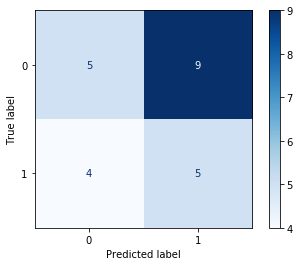

In [57]:
# Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
maxtix = plot_confusion_matrix(nb, X_test_dtm.toarray(), y_test, cmap='Blues', values_format='.3g')

In [58]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class, digits=4))

              precision    recall  f1-score   support

           0     0.5556    0.3571    0.4348        14
           1     0.3571    0.5556    0.4348         9

    accuracy                         0.4348        23
   macro avg     0.4563    0.4563    0.4348        23
weighted avg     0.4779    0.4348    0.4348        23



In [59]:
y_test.value_counts()

0    14
1     9
Name: lie_num, dtype: int64

In [60]:
reviews.loc[[59, 73, 44, 56, 74, 81, 84, 53, 54, 39, 40, 31, 80, 27, 38, 55, 10,
             2, 91, 89, 48, 19, 86], 'lie']

59    f
73    t
44    t
56    f
74    t
81    t
84    t
53    f
54    f
39    t
40    t
31    t
80    t
27    t
38    t
55    f
10    f
2     f
91    t
89    t
48    f
19    f
86    t
Name: lie, dtype: object

In [61]:
y_test

59    1
73    0
44    0
56    1
74    0
81    0
84    0
53    1
54    1
39    0
40    0
31    0
80    0
27    0
38    0
55    1
10    1
2     1
91    0
89    0
48    1
19    1
86    0
Name: lie_num, dtype: int64

In [62]:
result = (y_test.value_counts()[0]/y_test.shape[0])
print('Base model(null model) for lie prediction in testing set: {}%'.format(round(result, 2)))

Base model(null model) for lie prediction in testing set: 0.61%


#### K-fold Cross-validation

In [63]:
%%time
nb = MultinomialNB()

vect_cv= CountVectorizer(stop_words = "english")
X_dtm = vect_cv.fit_transform(X)

# evaluate with 5-fold cross-validation (using X instead of X_train)
from sklearn.model_selection import cross_val_score
result = cross_val_score(nb, X_dtm.toarray(), y, cv=5, scoring='accuracy').mean()
print('Accuracy: {}%'.format(round(result*100, 2)))

Accuracy: 61.93%
Wall time: 242 ms


In [64]:
print('Base model(null model) for lie prediction: {}%'.format((y.value_counts()/y.shape[0])[0]))

Base model(null model) for lie prediction: 0.5%


The 5-fold cross-validation model has 59.71 accuracy rate which is higher than the base model. 

#### Feature Ranking in MultinomialNB

In [65]:
X_tokens = vect_cv.get_feature_names()

In [66]:
# examine the first 50 tokens
print(X_tokens[0:50])

['10', '100', '15', '16', '20', '25', '2nd', '30', '50', '5pm', '6pm', '90', 'abc', 'abruptly', 'absolutely', 'acceptable', 'accord', 'acknowledge', 'actual', 'actually', 'ad', 'add', 'additional', 'adorable', 'affordable', 'aforementioned', 'afternoon', 'aghast', 'ago', 'agreed', 'air', 'albert', 'alfredo', 'amazing', 'ambiance', 'ambient', 'amer', 'america', 'american', 'angry', 'answering', 'anybody', 'appalled', 'appalling', 'appealing', 'appetizer', 'applebee', 'applebees', 'applied', 'appropriative']


In [67]:
# examine the last 50 tokens
print(X_tokens[-50:])

['warm', 'warmly', 'wasn', 'watch', 'watched', 'water', 'watery', 'way', 'wearing', 'week', 'weekend', 'weird', 'welcoming', 'went', 'weren', 'west', 'whatsoever', 'whelming', 'white', 'wifi', 'wine', 'wings', 'winning', 'winter', 'wish', 'woman', 'won', 'wonderful', 'wondering', 'words', 'worked', 'world', 'worm', 'worrying', 'worse', 'worst', 'worth', 'wouldn', 'wqr', 'wreck', 'write', 'written', 'wrong', 'wrote', 'xyz', 'yeah', 'yelp', 'yesterday', 'york', 'yuenan']


In [68]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [69]:
%%time 
# train the model using X_dtm
nb.fit(X_dtm, y)

Wall time: 3.99 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
nb.feature_count_
# rows represent classes, columns represent tokens
print("Shape: {}".format(nb.feature_count_.shape))

Shape: (2, 1254)


In [71]:
# number of times each token appears across all 'fake' class
fake_token_count = nb.feature_count_[0, :]
fake_token_count

array([2., 0., 0., ..., 0., 1., 0.])

In [72]:
# number of times each token appears across all 'true' class
true_token_count = nb.feature_count_[1, :]
true_token_count

array([2., 2., 6., ..., 1., 2., 1.])

In [73]:
# create a DataFrame of tokens with their separate atheism, forsale and med counts
tokens = pd.DataFrame({'token':X_tokens, 'fake':fake_token_count, 
                       'true':true_token_count}).set_index('token')

In [74]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

,fake,true
token,,
visiting,0.0,2.0
oil,0.0,2.0
stains,1.0,0.0
couldn,1.0,0.0
deep,1.0,0.0


In [75]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

array([46., 46.])

In [76]:
# Naive Bayes counts the number of observations for all classes
Total_vocab = tokens.shape[0]
print('Number of vocabulary learned: {}'.format(Total_vocab))

Number of vocabulary learned: 1254


In [77]:
# calculate the condition probabilities using Laplace smoother (N + |vocab|)
# https://scikit-learn.org/stable/modules/naive_bayes.html
tokens['fake'] = (tokens.fake + 1) / (nb.class_count_[0]+Total_vocab)
tokens['true'] = (tokens.true + 1) / (nb.class_count_[1]+Total_vocab)
tokens['fake_ratio'] = tokens.fake/tokens.true
tokens['true_ratio']=tokens.true/tokens.fake
tokens = tokens.sort_values('fake_ratio', ascending=False)
tokens.head(20)

,fake,true,fake_ratio,true_ratio
token,,,,
tofu,0.005385,0.000769,7.0,0.142857
makes,0.004615,0.000769,6.0,0.166667
tables,0.003846,0.000769,5.0,0.200000
coffee,0.003846,0.000769,5.0,0.200000
calling,0.003846,0.000769,5.0,0.200000
shrimp,0.003077,0.000769,4.0,0.250000
sommalier,0.003077,0.000769,4.0,0.250000
old,0.003077,0.000769,4.0,0.250000
case,0.003077,0.000769,4.0,0.250000


In [78]:
print('most indicative words for fake review')
tokens.loc[:,'fake'].sort_values(ascending=False)[:20]

most indicative words for fake review


token
food          0.033077
restaurant    0.033077
place         0.019231
good          0.015385
went          0.013077
best          0.010769
ordered       0.010769
great         0.010000
people        0.008462
time          0.008462
friends       0.007692
service       0.007692
waitress      0.007692
salad         0.006923
just          0.006923
like          0.006923
cheese        0.006923
really        0.006923
experience    0.006923
bar           0.006154
Name: fake, dtype: float64

In [79]:
print('most indicative words for true review')
tokens.loc[:,'true'].sort_values(ascending=False)[:20]

most indicative words for true review


token
food          0.030000
restaurant    0.026923
service       0.015385
place         0.015385
went          0.014615
minutes       0.014615
best          0.014615
experience    0.012308
plate         0.011538
ordered       0.011538
like          0.011538
great         0.010769
good          0.010000
amazing       0.007692
really        0.007692
friends       0.007692
fresh         0.007692
dishes        0.007692
order         0.007692
wait          0.007692
Name: true, dtype: float64

### Pipeline technique: feature extraction occurs within each fold of cross-validation (more general method)

**Why normal k-fold Cross-validation is improper cross-validation?**

- Normally, we split the data into training and testing sets **before** creating the document-term matrix. But since **`cross_val_score`** does the splitting for you, we passed it the feature matrix (**`X_dtm`**) rather than the raw text (**`X`**).
- However, that does not appropriately simulate the real world, in which your out-of-sample data will contain **features that were not seen** during model training.

**What's the solution?**

- We need a way to pass **`X`** (not **`X_dtm`**) to **`cross_val_score`**, and have the feature creation (via **`CountVectorizer`**) occur **within each fold** of cross-validation.
- We will do this by using a **`Pipeline`**.

In [80]:
# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [81]:
# import and instantiate CountVectorizer (with default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect_pipe = CountVectorizer()

In [82]:
%%time
# create a pipeline of clean_str, Count Vectoerizer and nb
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(vect_pipe, nb)

Wall time: 0 ns


In [83]:
# examine the pipeline steps
pipe.steps

[('countvectorizer',
  CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                  dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                  lowercase=True, max_df=1.0, max_features=None, min_df=1,
                  ngram_range=(1, 1), preprocessor=None, stop_words=None,
                  strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                  tokenizer=None, vocabulary=None)),
 ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]

In [84]:
%%time
cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean()
print('Accuracy: {}%'.format(round(result*100, 2)))

Accuracy: 61.93%
Wall time: 248 ms


### Adding features to a document-term matrix (using `FeatureUnion`)

- Below is a process that does allow for proper cross-validation, and does integrate well with the scikit-learn workflow.
- To use this process, we have to learn about transformers, **`FunctionTransformer`**, and **`FeatureUnion`**.

Transformer objects provide a `transform` method in order to perform **data transformations**. Here are a few examples:

- **`CountVectorizer`**
    - `fit` learns the vocabulary
    - `transform` creates a document-term matrix using the vocabulary
- **`SimpleImputer`**
    - `fit` learns the value to impute
    - `transform` fills in missing entries using the imputation value
- **`StandardScaler`**
    - `fit` learns the mean and scale of each feature
    - `transform` standardizes the features using the mean and scale
- **`HashingVectorizer`**
    - `fit` is not used, and thus it is known as a "stateless" transformer
    - `transform` creates the document-term matrix using a hash of the token

In [85]:
# define X and y
X = reviews.loc[:, ['review','review_length','review_tokens' ]]
y = reviews.lie_num

In [86]:
# define a function that accepts a DataFrame returns the manually created features
def get_manual(df):
    return df.loc[:, ['review_length','review_tokens']]

In [87]:
get_manual(reviews).head()

,review_length,review_tokens
0,239,44
1,353,61
2,120,25
3,222,43
4,367,68


[FunctionTransformer documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html)

In [88]:
from sklearn.preprocessing import FunctionTransformer
# create a stateless transformer from the get_manual function
get_manual_ft = FunctionTransformer(get_manual, validate=False)

In [89]:
# execute the function using the transform method
get_manual_ft.transform(reviews).head()

,review_length,review_tokens
0,239,44
1,353,61
2,120,25
3,222,43
4,367,68


In [90]:
# define a function that accepts a DataFrame returns the ingredients string
def get_text(df):
    return df.review

In [91]:
# create and test another transformer
get_text_ft = FunctionTransformer(get_text, validate=False)
get_text_ft.transform(reviews).head()

0                                                                                                                                    Mike's Pizza High Point, NY Service was very slow and the quality was low. You would think they would know at least how to make good pizza, not. Stick to pre-made dishes like stuffed pasta or a salad. You should consider dining else where.
1                  i really like this buffet restaurant in Marshall street. they have a lot of selection of american, japanese, and chinese dishes. we also got a free drink and free refill. there are also different kinds of dessert. the staff is very friendly. it is also quite cheap compared with the other restaurant in syracuse area. i will definitely coming back here.
2                                                                                                                                                                                                                                                           Af

#### Combining feature extraction steps

With the `FunctionTransformer` built, it can be combined into pipeline using `make_pipleine` and `make_union`.  
  * `make_union` can contain `make_pipleine` and `FunctionTransformer`.  
      * `make_pipleine` can contain `FunctionTransformer` and `CountVectorizer` as a series of pipeline

In [92]:
from sklearn.pipeline import make_union

In [93]:
# import and instantiate CountVectorizer (with default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect_features_manual = CountVectorizer(stop_words = "english")
vect_features_manual

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [94]:
# properly combine the transformers into a FeatureUnion
union = make_union(make_pipeline(get_text_ft, vect_features_manual), get_manual_ft)
X_dtm_manual = union.fit_transform(reviews)
X_dtm_manual.shape

(92, 1256)

In [96]:
print('CountVecterizor Features: {} \nMannual features:{}'.format(len(vect_features_manual.get_feature_names()),get_manual_ft.transform(reviews).shape[1]))

CountVecterizor Features: 1254 
Mannual features:2


 * `make_pipleine` combines `make_union` and classifier
     * `make_union` can contain `make_pipleine` and `FunctionTransformer`.  
         * `make_pipleine` can contain `FunctionTransformer` and `CountVectorizer` as a series of pipeline

In [97]:
# import and instantiate Multinomial Naive Bayes (with the default parameters)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [98]:
# create a pipeline of the FeatureUnion and Naive Bayes
pipe_features_model = make_pipeline(union, nb)

In [99]:
pipe_features_model.steps

[('featureunion',
  FeatureUnion(n_jobs=None,
               transformer_list=[('pipeline',
                                  Pipeline(memory=None,
                                           steps=[('functiontransformer',
                                                   FunctionTransformer(accept_sparse=False,
                                                                       check_inverse=True,
                                                                       func=<function get_text at 0x000001F6EC493840>,
                                                                       inv_kw_args=None,
                                                                       inverse_func=None,
                                                                       kw_args=None,
                                                                       validate=False)),
                                                  ('countvectorizer',
                                                   Co

In [100]:
%%time
# properly cross-validate the entire pipeline (and pass it the entire DataFrame)
result = cross_val_score(pipe_features_model, reviews, reviews.lie_num, cv=5, scoring='accuracy').mean()
print('Accuracy: {}%'.format(round(result*100, 2)))

Accuracy: 54.27%
Wall time: 76.5 ms


In [102]:
reviews.head()

,lie,sentiment,review,lie_num,sentiment_num,review_length,review_tokens
0,f,n,"Mike's Pizza High Point, NY Service was very slow and the quality was low. You would think they would know at least how to make good pizza, not. Stick to pre-made dishes like stuffed pasta or a salad. You should consider dining else where.",1,0,239,44
1,f,n,"i really like this buffet restaurant in Marshall street. they have a lot of selection of american, japanese, and chinese dishes. we also got a free drink and free refill. there are also different kinds of dessert. the staff is very friendly. it is also quite cheap compared with the other restaurant in syracuse area. i will definitely coming back here.",1,0,353,61
2,f,n,"After I went shopping with some of my friend, we went to DODO restaurant for dinner. I found worm in one of the dishes .",1,0,120,25
3,f,n,"Olive Oil Garden was very disappointing. I expect good food and good service (at least!!) when I go out to eat. The meal was cold when we got it, and the waitor had no manners whatsoever. Don't go to the Olive Oil Garden.",1,0,222,43
4,f,n,"The Seven Heaven restaurant was never known for a superior service but what we experienced last week was a disaster. The waiter would not notice us until we asked him 4 times to bring us the menu. The food was not exceptional either. It took them though 2 minutes to bring us a check after they spotted we finished eating and are not ordering more. Well, never more.",1,0,367,68
